In [120]:
import tensorflow as tf
import os

In [121]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [122]:
len(gpus)

1

In [123]:
gpus


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [124]:
#avoid oom error
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

`Remove photos with bad format`


In [157]:
import cv2
#check file extension
import imghdr
from matplotlib import pyplot as plt

In [158]:
data_dir = 'data'

In [159]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [160]:
img = cv2.imread(os.path.join(data_dir, 'tiredFaces', 'ChronicExhaustion_Blog880x495.jpg')) 

In [161]:
img.shape

(495, 880, 3)

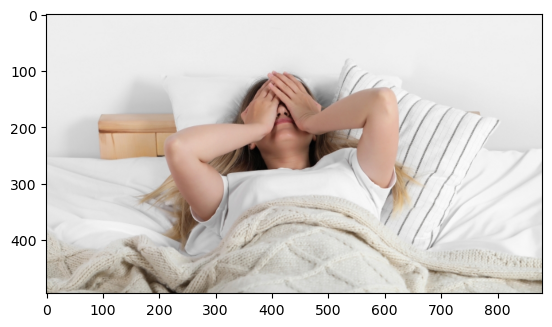

In [162]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [163]:
for image_class in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, image_class)):
        print(image_class)
        for image in os.listdir(os.path.join(data_dir, image_class)):
            print(image)
            image_path = os.path.join(data_dir, image_class, image);
            try:
                img = cv2.imread(image_path)
                ext = imghdr.what(image_path)
                if ext not in image_exts:
                    print('image not in extension list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {} : {}'.format(image_path, str(e)))
            

angryFaces
image22.jpeg
r1385324_19654588.jpg
GettyImages-930439736-609x419.jpg
headshot-angry-mad-face-asian-man-beard-mustache-headshot-angry-mad-face-asian-man-92931686.jpg
.DS_Store
image not in extension list data/angryFaces/.DS_Store
angry-face_650_082914120851.jpg
image23.jpeg
360_anger.jpg
7566101970_a8805e43b0_b.jpg
image12.jpeg
angry_face.jpg
17377054-close-up-image-of-man-gesturing-an-angry-face-against-white-background.jpg
39843011-angry-face-man.jpg
boy-angry-face-cartoon-cute-png.png
woman-with-big-angry-face-is-screaming_777078-7938.jpg
eaacce0c8432d620a9c8012d769e98d1.jpg
cartoon-angry-girl-face-emotion-vector-37663488.jpg
angry-man-screaming-260nw-101007865.jpg
image11.jpeg
r1385324_19654578.jpg
3d-rendered-illustration-angry-man-face_181203-19310.jpg
360_F_73243993_WfQ6CwwVbsSf36W0oLaCseTecG6dQMFm.jpg
angry20face.jpg
116999ecb25ac04c42cdac0a91c578439f-29-angry-face.rsocial.w1200.jpg
GettyImages-172586047-1024x683.jpg
32112919ae85abdc325c534f1ee3df2a.jpg
image21.jpeg
u

``Load Data using data pipeline``

In [164]:
import numpy as np

In [165]:
#preprocessing, classification, building data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 147 files belonging to 2 classes.


In [166]:
data_iterator = data.as_numpy_iterator()

In [167]:
batch = data_iterator.next() #access datapipeline, consist of an array of images and array of labels 1 or 0 for sad or tired

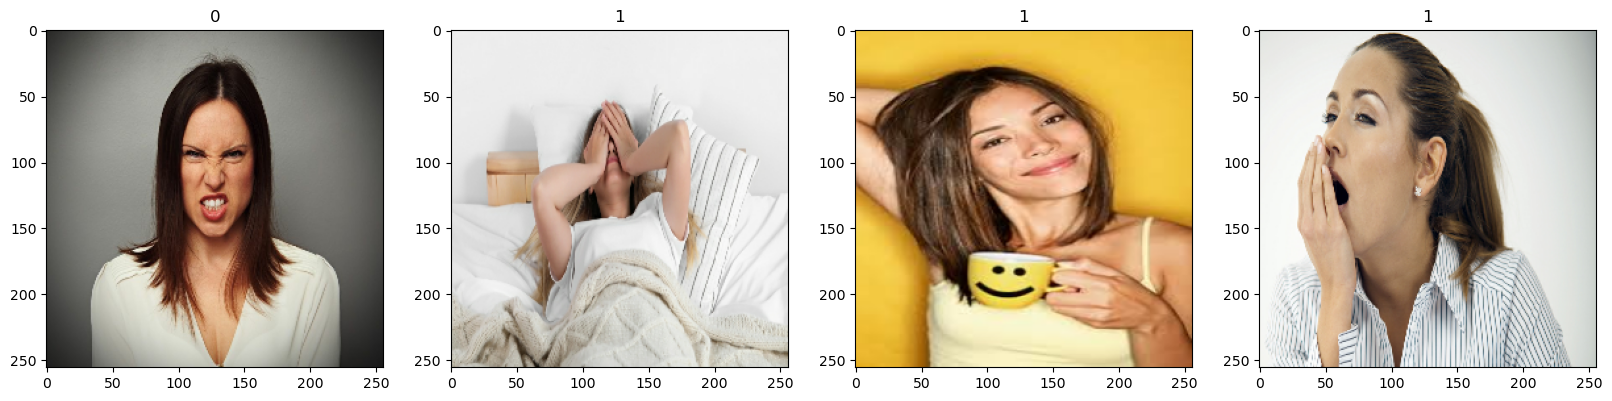

In [168]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for indx, img in enumerate(batch[0][:4]):
    ax[indx].imshow(img.astype(int))
    ax[indx].title.set_text(batch[1][indx])

Preprocess Data
- scale data
- split data

In [169]:
data = data.map(lambda x, y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.8901961 , 0.90588236, 0.91764706],
          [0.8901961 , 0.90588236, 0.91764706],
          [0.8918811 , 0.9075674 , 0.9193321 ],
          ...,
          [0.80784315, 0.8627451 , 0.8980392 ],
          [0.8136642 , 0.86856616, 0.9038603 ],
          [0.81927085, 0.8741728 , 0.9094669 ]],
 
         [[0.8901961 , 0.90588236, 0.91764706],
          [0.8901961 , 0.90588236, 0.91764706],
          [0.8918811 , 0.9075674 , 0.9193321 ],
          ...,
          [0.80784315, 0.8627451 , 0.8980392 ],
          [0.8136642 , 0.86856616, 0.9038603 ],
          [0.81927085, 0.8741728 , 0.9094669 ]],
 
         [[0.8901961 , 0.90588236, 0.91764706],
          [0.8901961 , 0.90588236, 0.91764706],
          [0.8918811 , 0.9075674 , 0.9193321 ],
          ...,
          [0.80784315, 0.8627451 , 0.8980392 ],
          [0.8132549 , 0.8681569 , 0.903451  ],
          [0.8187194 , 0.87362134, 0.90891546]],
 
         ...,
 
         [[0.44424018, 0.40894607, 0.38933823],
          [0.44525

In [170]:
len(data)

5

In [171]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)

In [172]:
train_size


3

In [173]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

- build model
- train model
- plot model performance

In [174]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [175]:
from tensorflow.keras.models import Sequential #good for one data input and output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#conv2D is my convolutional layer, MaxPooling helps extract and condense to max values after passing thru the filters
#flatten reduces it from convolutional layer to a layer where dense can use, to return single output

In [176]:
model = Sequential()
#first layer needs to be an input or have inputlayer, a convolutional layer with 16 filters, 3x3 matrix in size, stride of 1
#relu activation bumbps all values <0 to 0 and keeps positive values. Rectified Linear Units(ReLU)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#condense rows and column to 1D array input
model.add(Flatten())

model.add(Dense(256, activation= 'relu'))

#returns one output, a range 0<x<1, 0 is angry, 1 is tired

model.add(Dense(1, activation= 'sigmoid'))

In [177]:
#initialized as sequential. Uses an adam optimizer. Loss is as such because it is a binary classification
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [178]:
model.summary()
#first convu layer converts from 256,256,3 to 254,254,16.(16 layer filter)
#maxpool halves it

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 16)       

Train model

In [179]:
#log issues to log folder
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [180]:
#model.fit and model.predict. Train and test. training data is 3 batches of 32 images. epoch is no. of runs over entire training model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 5s 715ms/step - loss: 0.6077 - accuracy: 0.8021 - val_loss: 0.3973 - val_accuracy: 0.8750
Epoch 2/20
3/3 [==============================] - 2s 699ms/step - loss: 0.4423 - accuracy: 0.8646 - val_loss: 0.5472 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 2s 571ms/step - loss: 0.4743 - accuracy: 0.8021 - val_loss: 0.4446 - val_accuracy: 0.8125
Epoch 4/20
3/3 [==============================] - 2s 565ms/step - loss: 0.5020 - accuracy: 0.7812 - val_loss: 0.4530 - val_accuracy: 0.8125
Epoch 5/20
3/3 [==============================] - 2s 540ms/step - loss: 0.4453 - accuracy: 0.8125 - val_loss: 0.4580 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 2s 645ms/step - loss: 0.3792 - accuracy: 0.8542 - val_loss: 0.3335 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 2s 546ms/step - loss: 0.4682 - accuracy: 0.7917 - val_loss: 0.4744 - val_accuracy: 0.7812
Epoch 8/20
3/3 [====

```Plot data```

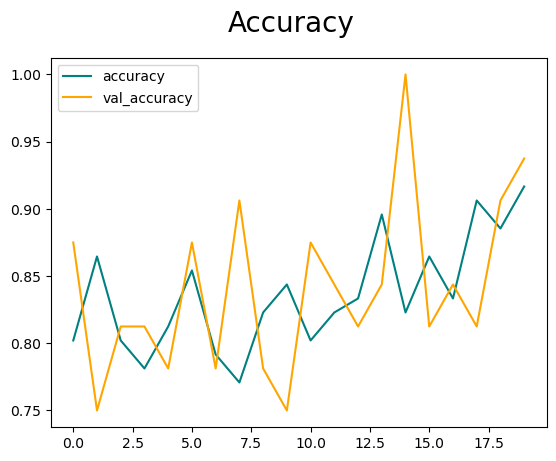

In [181]:
figure = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
figure.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

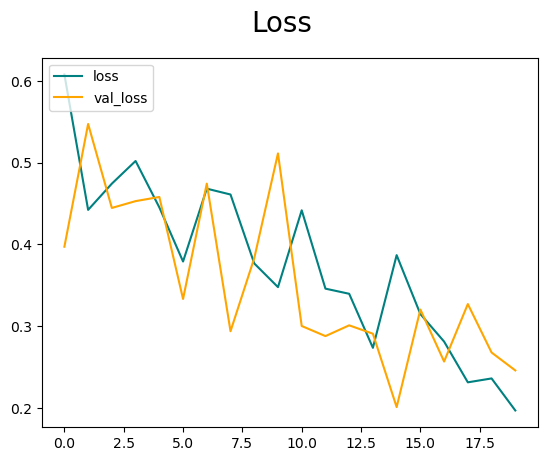

In [182]:
figure = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
figure.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Test Data


In [183]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [184]:
#loop thru each batch in test data( Only 1 here), 
for batch in test.as_numpy_iterator(): 
    X, y = batch #images and true value
    yhat = model.predict(X) #return value between 0 and 1
    #check true value with predicted value
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 233ms/step


In [185]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.944444477558136, Recall: 1.0, Accuracy: 0.9473684430122375


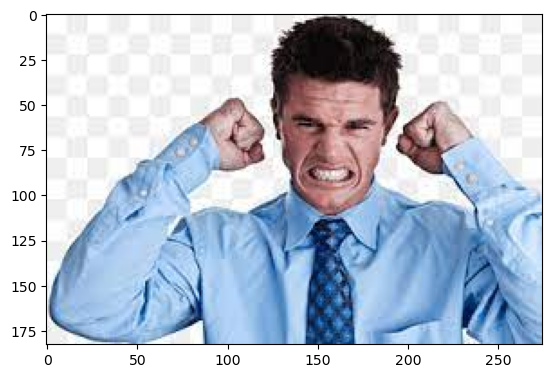

In [194]:
import cv2
img = cv2.imread('angrytester.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


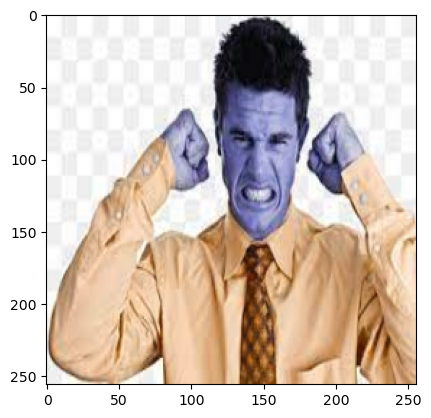

In [195]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [196]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #normalize and expand because it is expecting a batch.
yhat

1/1 [==============================] - 0s 37ms/step


array([[0.34281436]], dtype=float32)

In [197]:
if yhat > 0.5: 
    print(f'Predicted class is tired')
else:
    print(f'Predicted class is angry')

Predicted class is angry


Save model

In [198]:
from tensorflow.keras.models import load_model

In [201]:
model.save(os.path.join('models', 'tiredOrAngrymodel.keras'))

In [202]:
new_model = load_model(os.path.join('models', 'tiredOrAngrymodel.keras'))

In [204]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 [==============================] - 0s 76ms/step


array([[0.34281436]], dtype=float32)